In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv("forestfires.csv")

month_mapping = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
day_mapping = {'mon': 1, 'tue': 2, 'wed':3, 'thu': 4, 'fri': 5, 'sat':6, 'sun':7}

df['month'] = df['month'].map(month_mapping)
df['day'] = df['day'].map(day_mapping)
print(df.info())
print(df.head())
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 52.6 KB
None
   X  Y  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   

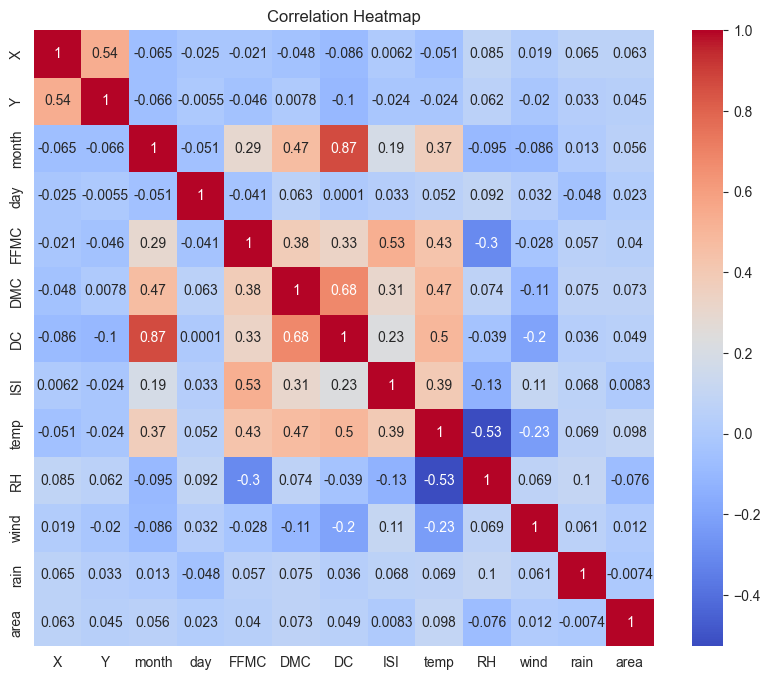

In [3]:
plt.figure(figsize = (10, 8))
correlations = df.corr()
sns.heatmap(correlations, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Training a linear regression model

In [4]:
import statsmodels.api as sm

columns = df.columns
y = df['area']
x = df[columns[:-1]]
x = sm.add_constant(x)
model = sm.OLS(y.astype(float), x.astype(float)).fit()

### Calcuate Cook's distance

In [5]:
np.set_printoptions(suppress=True)

# get cook's distance score
influence = model.get_influence()
cooks = influence.cooks_distance
print(cooks)

(array([0.00001719, 0.00005854, 0.00008239, 0.00003614, 0.00001642,
       0.00024846, 0.00021594, 0.00000106, 0.00006447, 0.00011132,
       0.00014669, 0.00003027, 0.00030763, 0.0000575 , 0.00015553,
       0.00005792, 0.00005219, 0.00013237, 0.00002532, 0.00001916,
       0.00004118, 0.00000995, 0.00076981, 0.00014868, 0.00021622,
       0.00007045, 0.00010011, 0.00006608, 0.00040518, 0.00016235,
       0.00010223, 0.0000033 , 0.00006046, 0.00006078, 0.00004185,
       0.00002279, 0.0001391 , 0.00001527, 0.00017704, 0.00000139,
       0.00020794, 0.00003939, 0.00000007, 0.0000171 , 0.00000141,
       0.00009192, 0.00000982, 0.00005702, 0.00000002, 0.00000205,
       0.00010132, 0.00005584, 0.00001568, 0.00001568, 0.00001182,
       0.00011265, 0.00000445, 0.0000029 , 0.00000108, 0.00005947,
       0.00000037, 0.00004004, 0.00003113, 0.00003972, 0.0000357 ,
       0.00001226, 0.00003229, 0.00003041, 0.00004159, 0.00002755,
       0.00004887, 0.00000686, 0.00005108, 0.00003107, 0.0000

### Visualize the cook's distance and find influencial points

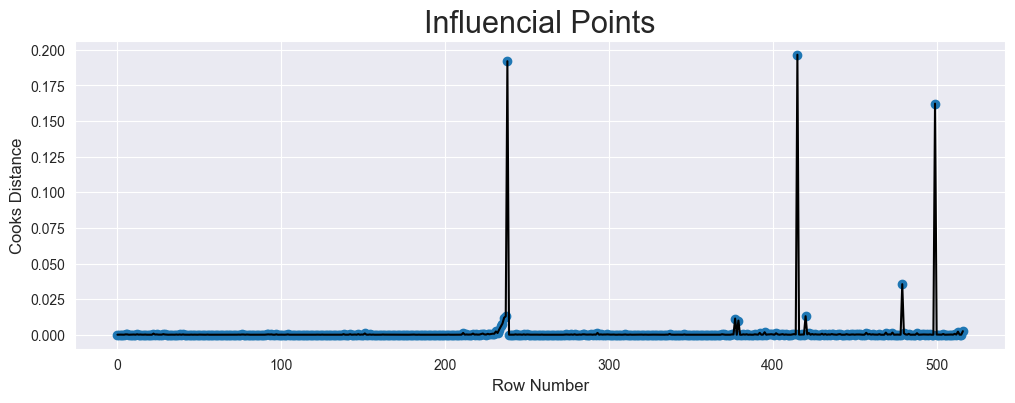

In [6]:
# Draw plot
plt.figure(figsize = (12, 4))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, cooks[0], color='black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

#### Mean Cook's distance

In [7]:
mean_cooks = np.mean(cooks[0])
print(mean_cooks)

0.0014150482225252841


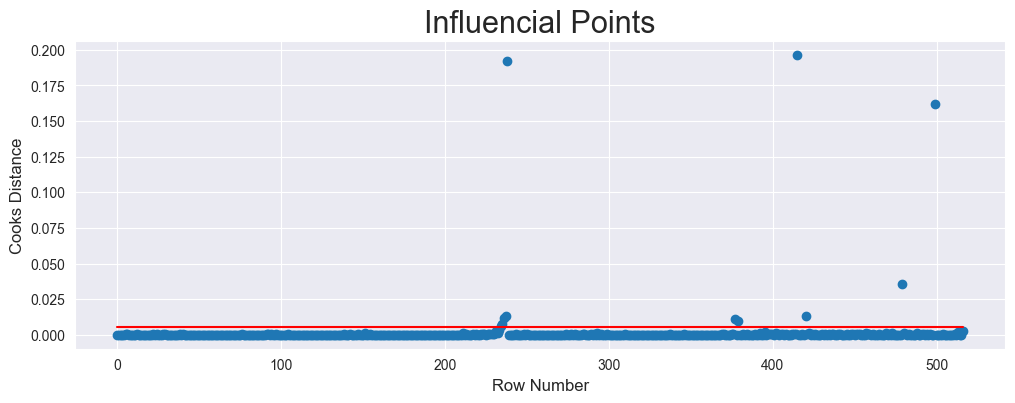

In [8]:
mean_cooks_list = [4*mean_cooks for i in df.index]
plt.figure(figsize = (12, 4))
plt.scatter(df.index, cooks[0])
plt.plot(df.index, mean_cooks_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Influencial Points', fontsize = 22)
plt.show()

In [9]:
print('Influencial points')
influencial_points = df.index[cooks[0] > 4*mean_cooks]
df.iloc[influencial_points, :]

Influencial points


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
234,4,5,9,6,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0,154.88
235,8,6,8,7,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48
236,2,2,9,6,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
237,1,2,9,2,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,9,6,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
377,2,2,8,6,93.7,231.1,715.1,8.4,21.9,42,2.2,0.0,174.63
379,4,5,1,7,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00
415,8,6,8,4,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
420,8,8,8,3,91.7,191.4,635.9,7.8,26.2,36,4.5,0.0,185.76
479,7,4,7,1,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


### Visualizing leverage points

In [10]:
lev = influence.hat_matrix_diag

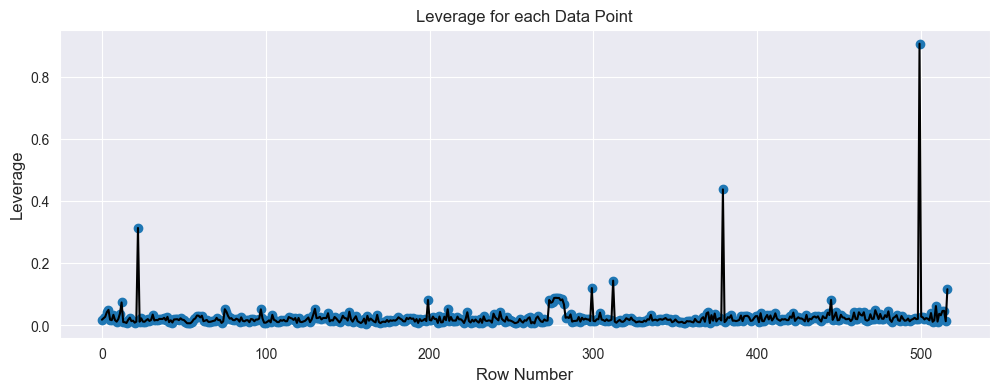

In [11]:
plt.figure(figsize = (12, 4))
plt.scatter(df.index, lev)
plt.plot(df.index, lev, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage for each Data Point')
plt.show()

#### Mean Leverage
The rows which have leverage greater than 3x of mean leverage are taken as leverage points

In [12]:
mean_lev = np.mean(lev)
mean_lev_list = [3*mean_lev for i in df.index]

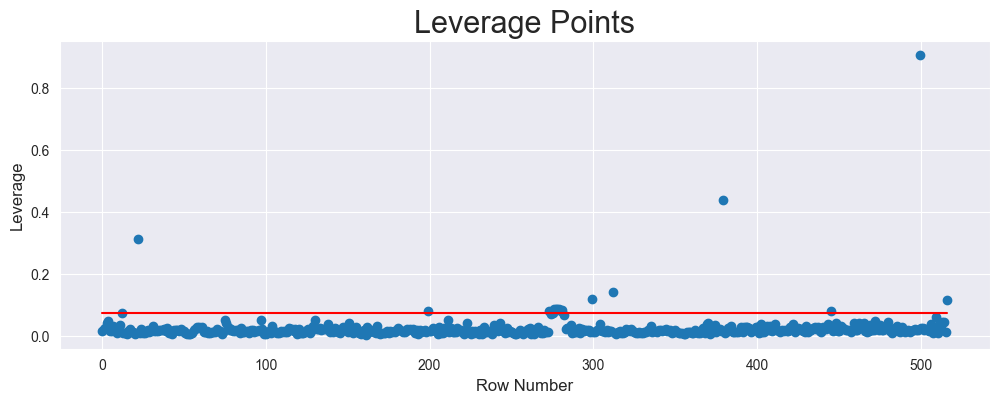

In [13]:
plt.figure(figsize = (12, 4))
plt.scatter(df.index, lev)
plt.plot(df.index, mean_lev_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage Points', fontsize = 22)
plt.show()

In [14]:
leverage_points = df.index[lev > (3 * mean_lev)]
print("LEVERAGE POINTS")
df.iloc[leverage_points, :]

LEVERAGE POINTS


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
22,7,4,6,7,94.3,96.3,200.0,56.1,21.0,44,4.5,0.0,0.00
199,2,4,9,1,63.5,70.8,665.3,0.8,22.6,38,3.6,0.0,11.32
273,4,6,12,7,84.4,27.2,353.5,6.8,4.8,57,8.5,0.0,8.98
275,4,6,12,4,84.6,26.4,352.0,2.0,5.1,61,4.9,0.0,5.38
276,4,4,12,1,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,17.85
277,3,4,12,1,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,10.73
278,4,4,12,1,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,22.03
279,4,4,12,1,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,9.77
280,4,6,12,5,84.7,26.7,352.6,4.1,2.2,59,4.9,0.0,9.27
281,6,5,12,2,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77


### Visualizing Outliers using residual

In [15]:
residuals = np.abs(model.resid)

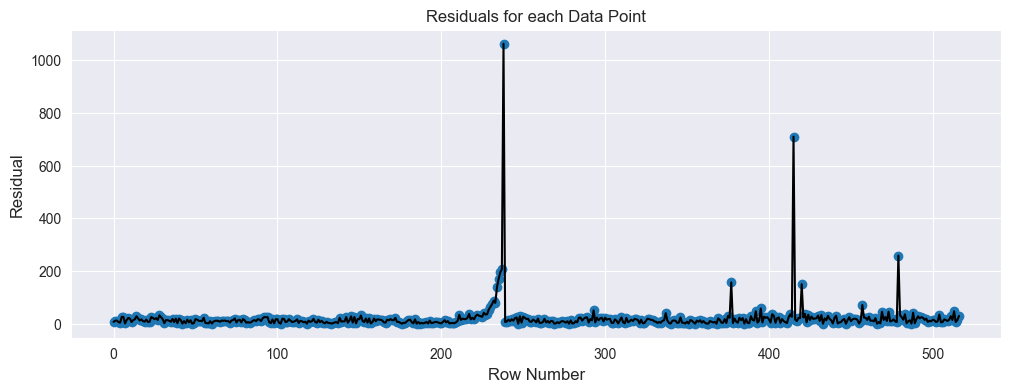

In [16]:

plt.figure(figsize = (12, 4))
plt.scatter(df.index, residuals)
plt.plot(df.index, residuals, color = 'black')
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Residuals for each Data Point')
plt.show()

#### Mean residual distance

In [17]:
mean_res = np.mean(residuals)
print(f'Mean: {mean_res}')

Mean: 19.309939164669373


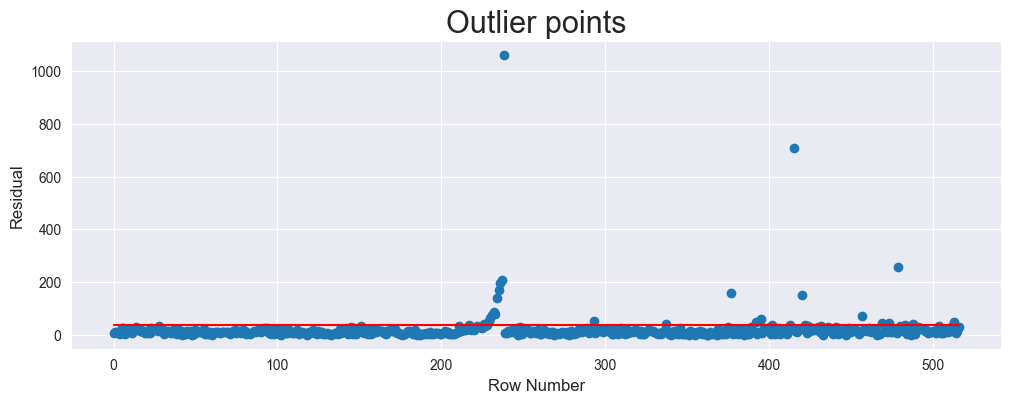

In [18]:
mean_res_list = [mean_res*2 for i in df.index]

plt.figure(figsize = (12, 4))
plt.scatter(df.index, residuals)
plt.plot(df.index, mean_res_list, color="red")
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Outlier points', fontsize = 22)
plt.show()

In [19]:
outlier_points = df.index[residuals > (mean_res*2)]
print("OUTLIER POINTS")
df.iloc[outlier_points, :]

OUTLIER POINTS


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
226,7,5,10,1,91.7,48.5,696.1,11.1,16.1,44,4.0,0.0,49.37
229,8,6,8,6,92.2,81.8,480.8,11.9,16.4,43,4.0,0.0,71.30
230,4,4,9,3,92.9,133.3,699.6,9.2,26.4,21,4.5,0.0,88.49
231,1,5,9,7,93.5,149.3,728.6,8.1,27.8,27,3.1,0.0,95.18
232,6,4,9,2,91.0,129.5,692.6,7.0,18.7,43,2.7,0.0,103.39
233,9,4,9,2,84.4,73.4,671.9,3.2,24.3,36,3.1,0.0,105.66
234,4,5,9,6,92.5,121.1,674.4,8.6,17.7,25,3.1,0.0,154.88
235,8,6,8,7,91.4,142.4,601.4,10.6,19.6,41,5.8,0.0,196.48
236,2,2,9,6,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94
237,1,2,9,2,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
